
タイトル：2020年　千葉県の事務従事者　

ノートブックに含まれるタスクの説明
→データのダウンロード、データのクリーンアップ、地図の作成

データのダウンロード

In [18]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import pandas as pd
# set font
import matplotlib as mpl
import matplotlib.pyplot as plt

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')

In [3]:
gdf = gpd.read_file('data/A002005212020DDSWC12')

In [4]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6678 non-null   object  
 1   PREF        6678 non-null   object  
 2   CITY        6678 non-null   object  
 3   S_AREA      6678 non-null   object  
 4   PREF_NAME   6678 non-null   object  
 5   CITY_NAME   6678 non-null   object  
 6   S_NAME      6676 non-null   object  
 7   KIGO_E      1090 non-null   object  
 8   HCODE       6678 non-null   int64   
 9   AREA        6678 non-null   float64 
 10  PERIMETER   6678 non-null   float64 
 11  R2KAxx      6678 non-null   int64   
 12  R2KAxx_ID   6678 non-null   int64   
 13  KIHON1      6678 non-null   object  
 14  DUMMY1      6678 non-null   object  
 15  KIHON2      6678 non-null   object  
 16  KEYCODE1    6678 non-null   object  
 17  KEYCODE2    6678 non-null   object  
 18  AREA_MAX_F  5961 non-null   object  
 19

In [5]:
gdf.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,121010010,12,101,001000,千葉県,千葉市中央区,青葉町,NaN,8101,842588.023,...,NaN,NaN,NaN,45,2671,1042,140.139806,35.596708,0010-00,"POLYGON ((140.13905 35.60238, 140.13932 35.601..."
1,121010020,12,101,002000,千葉県,千葉市中央区,赤井町,NaN,8101,1376645.540,...,NaN,NaN,NaN,19,1811,594,140.161263,35.571644,0020-00,"POLYGON ((140.16888 35.57593, 140.16898 35.575..."
2,121010030,12,101,003000,千葉県,千葉市中央区,旭町,NaN,8101,102837.597,...,NaN,NaN,NaN,30,1054,563,140.134230,35.608092,0030-00,"POLYGON ((140.13661 35.60893, 140.13667 35.608..."
3,121010040,12,101,004000,千葉県,千葉市中央区,市場町,NaN,8101,124328.185,...,NaN,NaN,NaN,13,517,326,140.124989,35.604252,0040-00,"POLYGON ((140.12594 35.60455, 140.12604 35.604..."
4,12101005001,12,101,005001,千葉県,千葉市中央区,稲荷町一丁目,NaN,8101,71910.356,...,NaN,NaN,NaN,18,756,380,140.124950,35.590755,0050-01,"POLYGON ((140.12566 35.59219, 140.12584 35.591..."


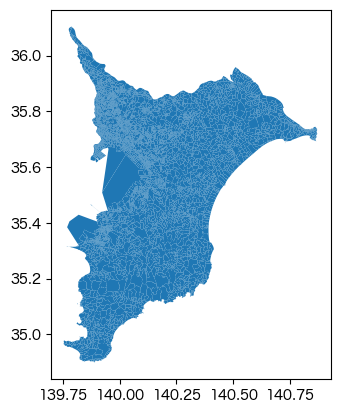

In [6]:
ax = gdf.plot()

In [7]:
# ダウンロードしたデータを読み込もう__encoding='cp932:文字化けをせずに、日本語でデータを読み取ることができる
df = pd.read_csv('data/2020/tblT001104C12.txt', encoding='cp932')

In [8]:
df

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001104001,T001104002,T001104003,T001104004,T001104005,T001104006,T001104007,T001104008,T001104009,T001104010,T001104011,T001104012,T001104013
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,総数,Ａ管理的職業従事者,Ｂ専門的・技術的職業従事者,Ｃ事務従事者,Ｄ販売従事者,Ｅサービス職業従事者,Ｆ保安職業従事者,Ｇ農林漁業従事者,Ｈ生産工程従事者,Ｉ輸送・機械運転従事者,Ｊ建設・採掘従事者,Ｋ運搬・清掃・包装等従事者,Ｌ分類不能の職業
1,12101.0,1.0,千葉市中央区,NaN,0.0,NaN,NaN,90423,1599,20127,21991,12178,10489,1873,334,7496,2798,3221,5745,2572
2,121010010.0,2.0,千葉市中央区,青葉町,0.0,NaN,NaN,1247,44,395,359,148,96,18,3,56,23,22,57,26
3,121010020.0,2.0,千葉市中央区,赤井町,0.0,NaN,NaN,678,6,136,147,84,75,20,15,68,37,38,43,9
4,121010030.0,2.0,千葉市中央区,旭町,0.0,NaN,NaN,405,6,98,94,57,47,8,6,25,15,6,26,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,124630140.0,2.0,鋸南町,岩井袋,0.0,NaN,NaN,69,-,5,7,5,19,2,7,10,2,7,4,1
6764,124630150.0,2.0,鋸南町,中佐久間,0.0,NaN,NaN,154,1,17,21,7,17,3,46,11,14,7,10,-
6765,124630160.0,2.0,鋸南町,上佐久間,0.0,NaN,NaN,153,4,15,15,14,19,2,45,13,5,11,9,1
6766,124630170.0,2.0,鋸南町,奥山,0.0,NaN,NaN,27,-,-,3,-,4,-,10,3,3,1,3,-


データのクリーンアップ

In [9]:
df= df.drop(df.index[0])

In [10]:
df.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001104001,T001104002,T001104003,T001104004,T001104005,T001104006,T001104007,T001104008,T001104009,T001104010,T001104011,T001104012,T001104013
1,12101.0,1.0,千葉市中央区,NaN,0.0,NaN,NaN,90423,1599,20127,21991,12178,10489,1873,334,7496,2798,3221,5745,2572
2,121010010.0,2.0,千葉市中央区,青葉町,0.0,NaN,NaN,1247,44,395,359,148,96,18,3,56,23,22,57,26
3,121010020.0,2.0,千葉市中央区,赤井町,0.0,NaN,NaN,678,6,136,147,84,75,20,15,68,37,38,43,9
4,121010030.0,2.0,千葉市中央区,旭町,0.0,NaN,NaN,405,6,98,94,57,47,8,6,25,15,6,26,17
5,121010040.0,2.0,千葉市中央区,市場町,0.0,NaN,NaN,205,3,61,38,32,23,11,-,9,1,11,12,4


In [11]:
df['T001104001']=pd.to_numeric(df['T001104001'],errors='coerce')
df['T001104002']=pd.to_numeric(df['T001104002'],errors='coerce')
df['T001104003']=pd.to_numeric(df['T001104003'],errors='coerce')
df['T001104004']=pd.to_numeric(df['T001104004'],errors='coerce')
df['T001104005']=pd.to_numeric(df['T001104005'],errors='coerce')
df['T001104006']=pd.to_numeric(df['T001104006'],errors='coerce')
df['T001104007']=pd.to_numeric(df['T001104007'],errors='coerce')
df['T001104008']=pd.to_numeric(df['T001104008'],errors='coerce')
df['T001104009']=pd.to_numeric(df['T001104009'],errors='coerce')
df['T001104010']=pd.to_numeric(df['T001104010'],errors='coerce')
df['T001104011']=pd.to_numeric(df['T001104011'],errors='coerce')
df['T001104012']=pd.to_numeric(df['T001104012'],errors='coerce')
df['T001104013']=pd.to_numeric(df['T001104013'],errors='coerce')



In [12]:
df.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001104001,T001104002,T001104003,T001104004,T001104005,T001104006,T001104007,T001104008,T001104009,T001104010,T001104011,T001104012,T001104013
1,12101.0,1.0,千葉市中央区,NaN,0.0,NaN,NaN,90423.0,1599.0,20127.0,21991.0,12178.0,10489.0,1873.0,334.0,7496.0,2798.0,3221.0,5745.0,2572.0
2,121010010.0,2.0,千葉市中央区,青葉町,0.0,NaN,NaN,1247.0,44.0,395.0,359.0,148.0,96.0,18.0,3.0,56.0,23.0,22.0,57.0,26.0
3,121010020.0,2.0,千葉市中央区,赤井町,0.0,NaN,NaN,678.0,6.0,136.0,147.0,84.0,75.0,20.0,15.0,68.0,37.0,38.0,43.0,9.0
4,121010030.0,2.0,千葉市中央区,旭町,0.0,NaN,NaN,405.0,6.0,98.0,94.0,57.0,47.0,8.0,6.0,25.0,15.0,6.0,26.0,17.0
5,121010040.0,2.0,千葉市中央区,市場町,0.0,NaN,NaN,205.0,3.0,61.0,38.0,32.0,23.0,11.0,NaN,9.0,1.0,11.0,12.0,4.0


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6678 non-null   object  
 1   PREF        6678 non-null   object  
 2   CITY        6678 non-null   object  
 3   S_AREA      6678 non-null   object  
 4   PREF_NAME   6678 non-null   object  
 5   CITY_NAME   6678 non-null   object  
 6   S_NAME      6676 non-null   object  
 7   KIGO_E      1090 non-null   object  
 8   HCODE       6678 non-null   int64   
 9   AREA        6678 non-null   float64 
 10  PERIMETER   6678 non-null   float64 
 11  R2KAxx      6678 non-null   int64   
 12  R2KAxx_ID   6678 non-null   int64   
 13  KIHON1      6678 non-null   object  
 14  DUMMY1      6678 non-null   object  
 15  KIHON2      6678 non-null   object  
 16  KEYCODE1    6678 non-null   object  
 17  KEYCODE2    6678 non-null   object  
 18  AREA_MAX_F  5961 non-null   object  
 19

データのマージ

In [14]:
gdf['KEY_CODE']=gdf['KEY_CODE'].astype(float)

In [15]:
gdf=gdf.merge(df,on='KEY_CODE')

In [16]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6678 non-null   float64 
 1   PREF        6678 non-null   object  
 2   CITY        6678 non-null   object  
 3   S_AREA      6678 non-null   object  
 4   PREF_NAME   6678 non-null   object  
 5   CITY_NAME   6678 non-null   object  
 6   S_NAME      6676 non-null   object  
 7   KIGO_E      1090 non-null   object  
 8   HCODE       6678 non-null   int64   
 9   AREA        6678 non-null   float64 
 10  PERIMETER   6678 non-null   float64 
 11  R2KAxx      6678 non-null   int64   
 12  R2KAxx_ID   6678 non-null   int64   
 13  KIHON1      6678 non-null   object  
 14  DUMMY1      6678 non-null   object  
 15  KIHON2      6678 non-null   object  
 16  KEYCODE1    6678 non-null   object  
 17  KEYCODE2    6678 non-null   object  
 18  AREA_MAX_F  5961 non-null   object  
 19

In [17]:
gdf.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,T001104004,T001104005,T001104006,T001104007,T001104008,T001104009,T001104010,T001104011,T001104012,T001104013
0,1.210100e+08,12,101,001000,千葉県,千葉市中央区,青葉町,NaN,8101,842588.023,...,359.0,148.0,96.0,18.0,3.0,56.0,23.0,22.0,57.0,26.0
1,1.210100e+08,12,101,002000,千葉県,千葉市中央区,赤井町,NaN,8101,1376645.540,...,147.0,84.0,75.0,20.0,15.0,68.0,37.0,38.0,43.0,9.0
2,1.210100e+08,12,101,003000,千葉県,千葉市中央区,旭町,NaN,8101,102837.597,...,94.0,57.0,47.0,8.0,6.0,25.0,15.0,6.0,26.0,17.0
3,1.210100e+08,12,101,004000,千葉県,千葉市中央区,市場町,NaN,8101,124328.185,...,38.0,32.0,23.0,11.0,NaN,9.0,1.0,11.0,12.0,4.0
4,1.210101e+10,12,101,005001,千葉県,千葉市中央区,稲荷町一丁目,NaN,8101,71910.356,...,73.0,53.0,48.0,7.0,NaN,35.0,11.0,13.0,23.0,8.0


地図の作成

(139.69708947932398, 140.92903088326946, 34.83887222820458, 36.16436577939237)

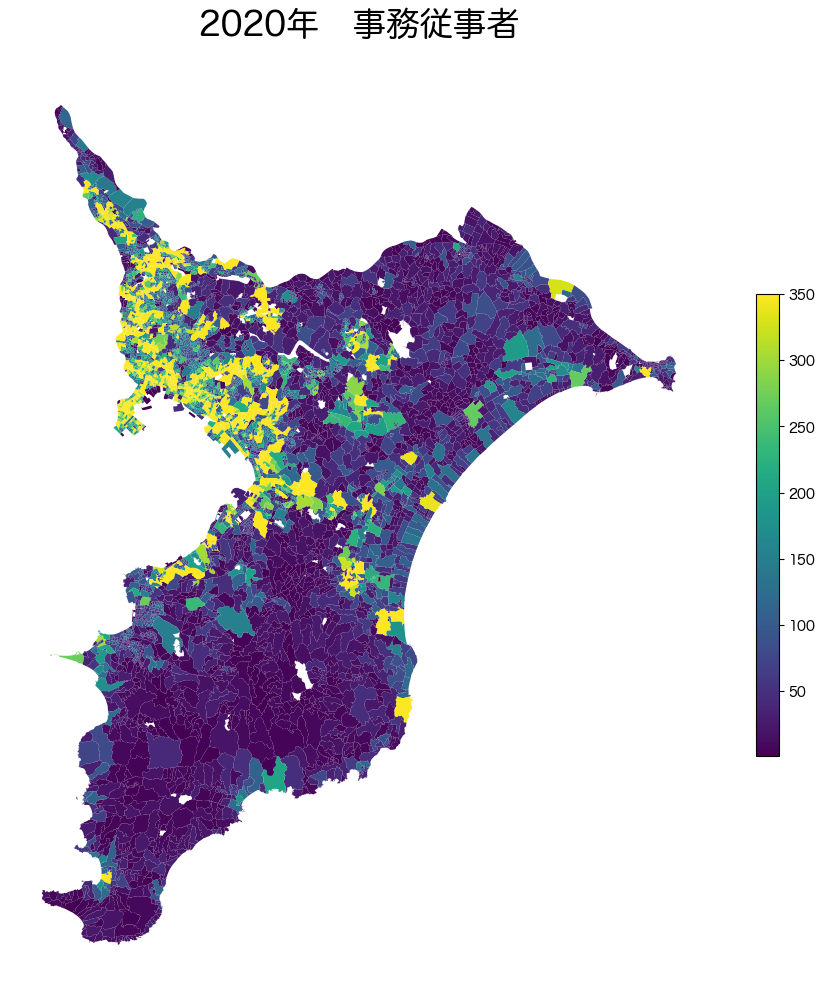

In [30]:
#Vmaxなど図の表し方は統一させる→比較するためには必要
fig,ax = plt.subplots(figsize =(12,12))

gdf.plot(ax = ax,
         column= 'T001104004',
         legend=True,
         vmax= 350,
         legend_kwds={'shrink': 0.5},
         )
# title
ax.set_title('2020年　事務従事者',fontsize=24, pad=20)

# hide axes
ax.axis('off')

２０２０,２０１０,２０００年の千葉県　事務従事者を棒グラフで比較するための準備

In [32]:
gdf['T001104001'].sum()

3572736.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

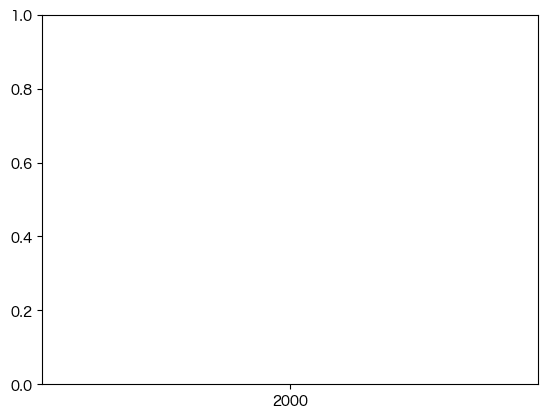

In [35]:
#２０００,２０１０,２０２０の就業者総人口と事務従事者の変化を棒グラフや棒線グラフで比較するとなおイイ
import matplotlib.pyplot as plt

categories = ['2000','2010','2020']
values = [10, 23, 7, 15]

plt.bar(categories, values)
plt.title('Sample Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


感想
地図を表示させることができなくて嫌になった。けど、やり方やなんでできていないのを教えてもらって謎が解明できた時と地図が表示された時は楽しいと感じた！
地図が表示されるまでの細かい作業をするときの忍耐強さが必要だと思った。

残ってるタスクの説明
・地図の凡例や最大値などをチームメンバーで統一させること
・事務従事者を棒グラフで比較する作業